In [1]:

# --- Auto-added helpers & compatibility fixes ---
import numpy as np
import matplotlib.pyplot as plt
try:
    from xgboost import callback  # for EarlyStopping/EvaluationMonitor on 2.x
except Exception as _e:
    # If unavailable, we will fallback in later cells if needed
    pass


In [2]:
# 1) 완전 제거
!pip uninstall -y pandas numpy xgboost
!pip cache purge  # 선택사항: 캐시 비우기

# 2) 호환 버전으로 재설치 (Python 3.12 기준, 안정 조합 예시)
!pip install --no-cache-dir --only-binary=:all: \
  "numpy>=2.0,<2.2" \
  "pandas>=2.1,<2.3" \
  "xgboost>=2.0"

# 3) (선택) 시각화 쓰면 matplotlib도 함께
!pip install --no-cache-dir --only-binary=:all: matplotlib

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: xgboost 3.0.5
Uninstalling xgboost-3.0.5:
  Successfully uninstalled xgboost-3.0.5
Files removed: 0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 180.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 140.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is i

In [3]:
from xgboost import plot_importance
import pandas  as  pd
import numpy  as  np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
dataset = load_breast_cancer()
features= dataset.data
labels = dataset.target
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']=  labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [5]:
X_features = cancer_df.iloc[:,  :-1 ]
y_label = cancer_df.iloc[:, -1 ]

In [6]:
X_train,   X_test, y_train,   y_test=train_test_split(X_features, y_label, test_size=0.2,
random_state=  156  )
#   위에서     만든    X.train, y_train을    다시     쪼개서     90%는    학습과    10%는     검증용    데이터로    분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1,  random_state=156  )
print(X_train.shape  ,  X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [7]:
import xgboost as xgb

dtr = xgb.DMatrix(data=X_tr,  label=y_tr)
dval = xgb. DMatrix(data=X_val,  label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [8]:
params = {'max_depth': 3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss',

}
num_rounds = 400

In [9]:
eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params = params  ,  dtrain=dtr ,  num_boost_round=num_rounds  ,  \
early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.62473	eval-logloss:0.63088
[1]	train-logloss:0.58662	eval-logloss:0.60461
[2]	train-logloss:0.55210	eval-logloss:0.58205
[3]	train-logloss:0.52068	eval-logloss:0.56165
[4]	train-logloss:0.49173	eval-logloss:0.54101
[5]	train-logloss:0.46517	eval-logloss:0.52206
[6]	train-logloss:0.44009	eval-logloss:0.50271
[7]	train-logloss:0.41646	eval-logloss:0.48606
[8]	train-logloss:0.39505	eval-logloss:0.46961
[9]	train-logloss:0.37523	eval-logloss:0.45485
[10]	train-logloss:0.35682	eval-logloss:0.44120
[11]	train-logloss:0.33964	eval-logloss:0.43123
[12]	train-logloss:0.32279	eval-logloss:0.41962
[13]	train-logloss:0.30783	eval-logloss:0.40848
[14]	train-logloss:0.29308	eval-logloss:0.39857
[15]	train-logloss:0.27928	eval-logloss:0.38945
[16]	train-logloss:0.26681	eval-logloss:0.38171
[17]	train-logloss:0.25498	eval-logloss:0.37381
[18]	train-logloss:0.24352	eval-logloss:0.36656
[19]	train-logloss:0.23307	eval-logloss:0.36014
[20]	train-logloss:0.22290	eval-logloss:0.35395
[2

In [10]:
pred_probs =xgb_model.predict(dtest)
print('predict()수행결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

preds = [ 1 if x>0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict()수행결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.776 0.058 0.975 1.    0.999 0.999 0.998 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [11]:
from sklearn.metrics import accuracy_score, precision_score,  recall_score, confusion_matrix
def get_clf_eval(y_test,   pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차   행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도:  {1:.4f}, 재현율:  {2:.4f}'. format (accuracy,  precision, recall))

In [12]:
get_clf_eval(y_test ,  preds)

오차   행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도:  0.9740, 재현율:  0.9740


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

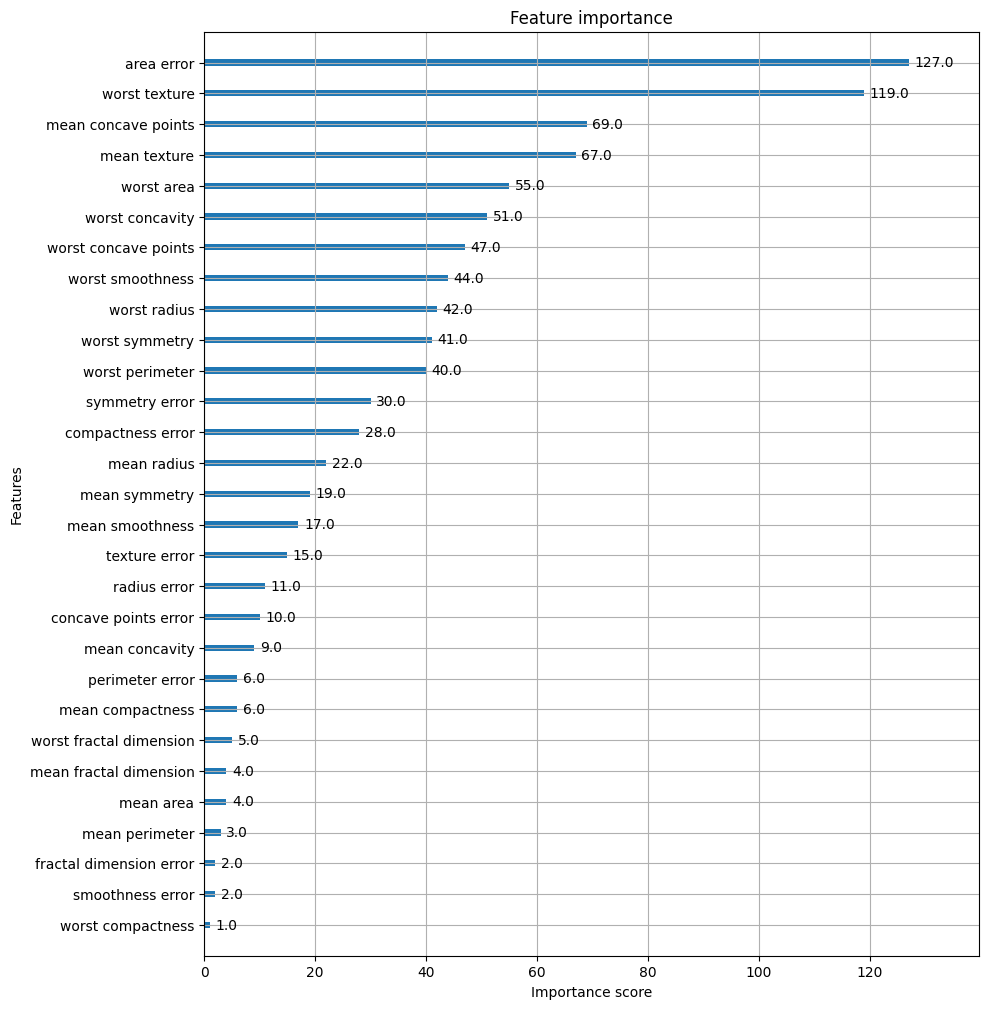

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [14]:
#   사이킷런     래퍼    XGBoost 클래스인    XGBClassifier 임포트
from xgboost import XGBClassifier
# Warning 메시지를 없애기 위해 eval.metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
eval_metric='logloss')
xgb_wrapper.fit(X_train,  y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,  1]

In [15]:
get_clf_eval(y_test ,  w_preds, )

오차   행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도:  0.9620, 재현율:  0.9870


In [71]:
from xgboost import XGBClassifier
# from xgboost.callback import EarlyStopping # EarlyStopping callback is not supported in this version's fit method

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr),   (X_val,   y_val)]

# Define the EarlyStopping callback
# early_stopping = EarlyStopping(
#     rounds=50,  # Same as early_stopping_rounds
#     # Parameters like monitor, metric, and data_inst are not supported in this version's EarlyStopping constructor
# )

# Fit the model using the callbacks parameter
xgb_wrapper.fit(X_tr,  y_tr,
                eval_set=evals,
                # callbacks=[early_stopping] # Pass the callback in a list
                # early_stopping_rounds=50, # Use early_stopping_rounds instead
                # eval_metric='logloss' # Specify eval_metric
                )

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,  1  ]

[0]	validation_0-logloss:0.62473	validation_1-logloss:0.63088
[1]	validation_0-logloss:0.58662	validation_1-logloss:0.60461
[2]	validation_0-logloss:0.55210	validation_1-logloss:0.58205
[3]	validation_0-logloss:0.52068	validation_1-logloss:0.56165
[4]	validation_0-logloss:0.49173	validation_1-logloss:0.54101
[5]	validation_0-logloss:0.46517	validation_1-logloss:0.52206
[6]	validation_0-logloss:0.44009	validation_1-logloss:0.50271
[7]	validation_0-logloss:0.41646	validation_1-logloss:0.48606
[8]	validation_0-logloss:0.39505	validation_1-logloss:0.46961
[9]	validation_0-logloss:0.37523	validation_1-logloss:0.45485
[10]	validation_0-logloss:0.35682	validation_1-logloss:0.44120
[11]	validation_0-logloss:0.33964	validation_1-logloss:0.43123
[12]	validation_0-logloss:0.32279	validation_1-logloss:0.41962
[13]	validation_0-logloss:0.30783	validation_1-logloss:0.40848
[14]	validation_0-logloss:0.29308	validation_1-logloss:0.39857
[15]	validation_0-logloss:0.27928	validation_1-logloss:0.38945
[1

In [75]:
xgb_wrapper.fit(X_tr, y_tr,
eval_set=evals)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,  1]
get_clf_eval(y_test ,  ws10_preds)

[0]	validation_0-logloss:0.62473	validation_1-logloss:0.63088
[1]	validation_0-logloss:0.58662	validation_1-logloss:0.60461
[2]	validation_0-logloss:0.55210	validation_1-logloss:0.58205
[3]	validation_0-logloss:0.52068	validation_1-logloss:0.56165
[4]	validation_0-logloss:0.49173	validation_1-logloss:0.54101
[5]	validation_0-logloss:0.46517	validation_1-logloss:0.52206
[6]	validation_0-logloss:0.44009	validation_1-logloss:0.50271
[7]	validation_0-logloss:0.41646	validation_1-logloss:0.48606
[8]	validation_0-logloss:0.39505	validation_1-logloss:0.46961
[9]	validation_0-logloss:0.37523	validation_1-logloss:0.45485
[10]	validation_0-logloss:0.35682	validation_1-logloss:0.44120
[11]	validation_0-logloss:0.33964	validation_1-logloss:0.43123
[12]	validation_0-logloss:0.32279	validation_1-logloss:0.41962
[13]	validation_0-logloss:0.30783	validation_1-logloss:0.40848
[14]	validation_0-logloss:0.29308	validation_1-logloss:0.39857
[15]	validation_0-logloss:0.27928	validation_1-logloss:0.38945
[1

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

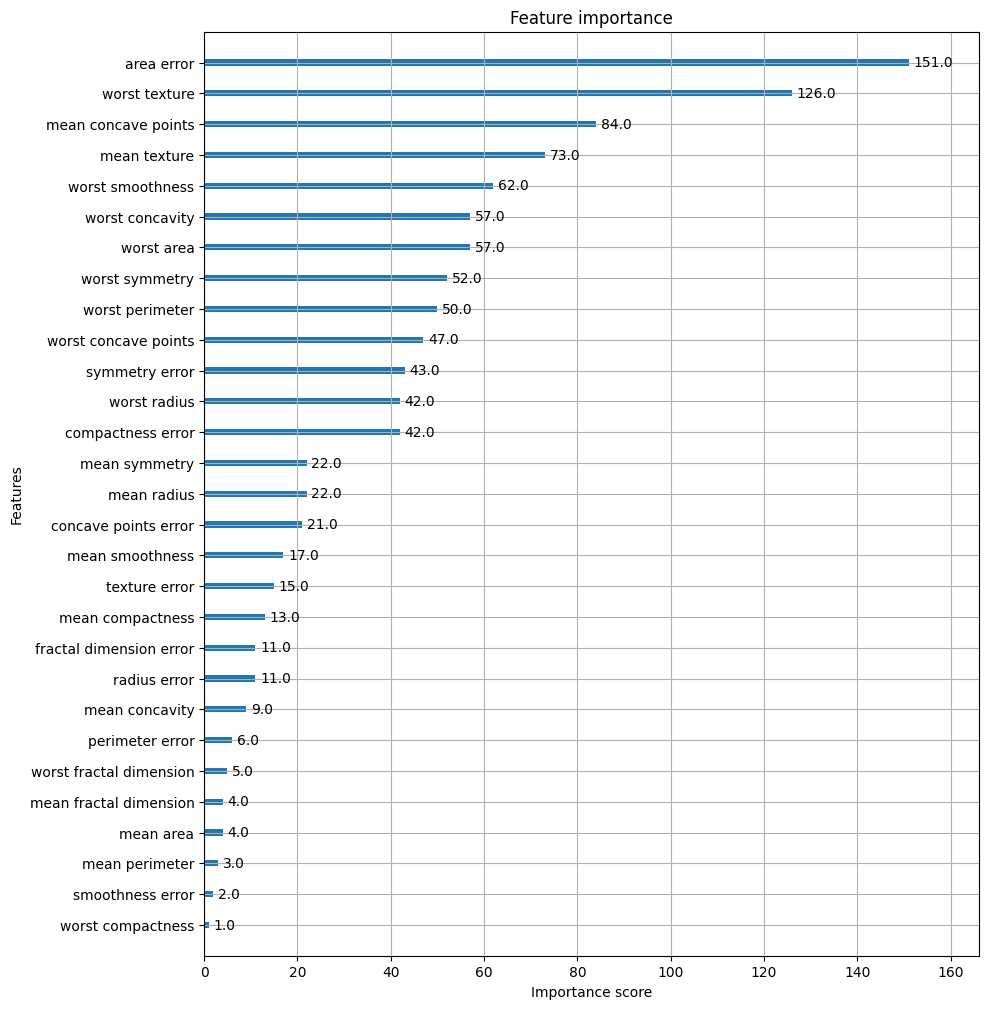

In [76]:
from xgboost import plot_importance
import matplotlib.pyplot as  pit
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)

In [78]:
get_clf_eval(y_test ,  ws10_preds)

오차   행렬
[[46  1]
 [ 1 66]]
정확도: 0.9825, 정밀도:  0.9851, 재현율:  0.9851


Light GBM

In [20]:
!pip install lightgbm==3.3.2
import lightgbm
from lightgbm import LGBMClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.6.0
    Uninstalling lightgbm-4.6.0:
      Successfully uninstalled lightgbm-4.6.0


In [21]:
#위스콘신 유방암 예측
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [22]:
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1 ]
#    전체     데이터     중    80%는    학습용    데이터, 20%는    테스트용    데이터     추출
X_train, X_test, y_train, y_test=train_test_split(X_features,  y_label, test_size=0.2,   random_state=156  )
#    위에서     만든    X_trainz   y_train을    다시     쪼개서     90%는    학습과    10%는    검증용    데이터로    분리
X_tr, X_val,y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1,  random_state=156  )
#     앞서     XGBoost와    동일하게    n_estimators는   400  설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)
#    LightGBM도   XGBoost와   동일하게    조기     중단   수행     가능.
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr,   early_stopping_rounds=50, eval_metric="logloss",
eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
predjDroba = lgbm_wrapper.predict_proba(X_test)[:,  1  ]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

In [23]:
get_clf_eval(y_test, preds)

오차   행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도:  0.9615, 재현율:  0.9740


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

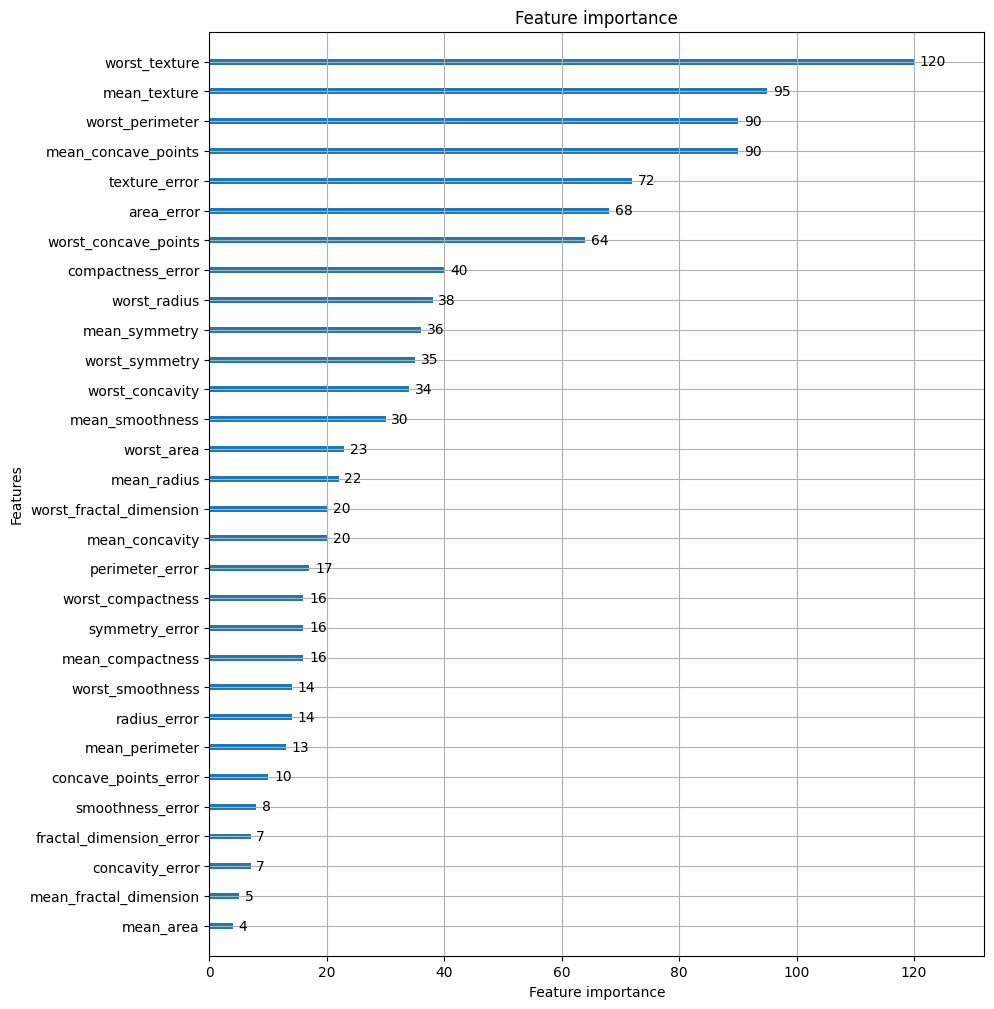

In [24]:
from lightgbm import plot_importance
import matplotlib.pyplot as  pit
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,  12))
plot_importance(lgbm_wrapper,  ax=ax)

In [25]:
pip install hyperopt

In [26]:
from hyperopt import hp
search_space = {'x':hp.quniform('x',-10,10,1),'y':hp.quniform('y',-15,15,1)}

In [27]:
from hyperopt import STATUS_OK
#    목적     함수를    생성.  변숫값과    변수     검색     공간을    가지는    딕셔너리를    인자로    받고, 특정     값을     반환
def objective_func(search_space):
  x = search_space['x' ]
  y = search_space[ 'y' ]
  retval = x**2 - 20*y
  return retval

In [28]:
from hyperopt import fmin, tpe, Trials
import numpy as np

trial_val = Trials()
rng = np.random.default_rng(seed=0)  # Generator API

best_01 = fmin(
    fn=objective_func,
    space=search_space,
    algo=tpe.suggest,
    max_evals=5,
    trials=trial_val,
    rstate=rng
)

print("best:", best_01)
#버전이 안 맞아서 오류가 지속적으로 나기에 같은 결과를 내는 다른 문법으로 대체함

100%|██████████| 5/5 [00:00<00:00, 128.69trial/s, best loss: -224.0]
best: {'x': np.float64(-4.0), 'y': np.float64(12.0)}


In [29]:
from hyperopt import fmin, tpe, Trials
import numpy as np

trial_val = Trials()
rng = np.random.default_rng(seed=0)  # Generator API

best_02 = fmin(
    fn=objective_func,
    space=search_space,
    algo=tpe.suggest,
    max_evals=20,
    trials=trial_val,
    rstate=rng
)

print("best:", best_02)
#버전이 안 맞아서 오류가 지속적으로 나기에 같은 결과를 내는 다른 문법으로 대체함

100%|██████████| 20/20 [00:00<00:00, 246.60trial/s, best loss: -296.0]
best: {'x': np.float64(2.0), 'y': np.float64(15.0)}


In [30]:
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [31]:
print(trial_val.vals)

{'x': [np.float64(-6.0), np.float64(-4.0), np.float64(4.0), np.float64(-4.0), np.float64(9.0), np.float64(2.0), np.float64(10.0), np.float64(-9.0), np.float64(-8.0), np.float64(-0.0), np.float64(-0.0), np.float64(1.0), np.float64(9.0), np.float64(6.0), np.float64(9.0), np.float64(2.0), np.float64(-2.0), np.float64(-4.0), np.float64(7.0), np.float64(-0.0)], 'y': [np.float64(5.0), np.float64(10.0), np.float64(-2.0), np.float64(12.0), np.float64(1.0), np.float64(15.0), np.float64(7.0), np.float64(-10.0), np.float64(0.0), np.float64(-5.0), np.float64(-3.0), np.float64(2.0), np.float64(4.0), np.float64(10.0), np.float64(3.0), np.float64(3.0), np.float64(-14.0), np.float64(-8.0), np.float64(11.0), np.float64(-0.0)]}


In [32]:
import pandas as pd
losses = [loss_dict['loss']for loss_dict in trial_val.results]
results_df = pd.DataFrame({'x': trial_val.vals['x'],
'y': trial_val.vals['y'],
'losses': losses})
results_df


,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


In [33]:
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2,   random_state=156  )

In [34]:
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1,  random_state=156  )

In [36]:
from hyperopt import hp
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20,1),
                    'min_child_weight': hp.quniform('min_child_weight', 1,2,1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                    }

In [35]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

In [37]:
def objective_func(search_space):
  xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          learning_rate=search_space['learning_rate'],
                          colsample_bytree=search_space['colsample_bytree'],
                          eval_metric='logloss')
  accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
  return {'loss': -np.mean(accuracy), 'status': STATUS_OK}

In [38]:
from hyperopt import fmin, tpe, Trials
trial_val = Trials()
best = fmin(fn=objective_func,space=xgb_search_space,algo=tpe.suggest,max_evals=50,   # 최대     반복    횟수를    지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|██████████| 50/50 [00:16<00:00,  3.10trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': np.float64(0.858999866296754), 'learning_rate': np.float64(0.17459146963933464), 'max_depth': np.float64(20.0), 'min_child_weight': np.float64(2.0)}


In [39]:
print('colsample_bytree:{0},  learning_rate:{1},  max_depth:{2}, min_child_weight:{3}'.format(
round(best['colsample_bytree'],  5), round(best['learning_rate'],  5),
int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.859,  learning_rate:0.17459,  max_depth:20, min_child_weight:2


In [40]:
import xgboost as xgb
import numpy as np

# DMatrix 생성
dtr   = xgb.DMatrix(X_tr,  label=y_tr)
dval  = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

# 파라미터 (binary 분류 예시)
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": float(round(best['learning_rate'], 5)),
    "max_depth": int(best['max_depth']),
    "min_child_weight": int(best['min_child_weight']),
    "colsample_bytree": float(round(best['colsample_bytree'], 5)),
    "tree_method": "hist",
}

evals = [(dtr, "train"), (dval, "valid")]
bst = xgb.train(
    params=params,
    dtrain=dtr,
    num_boost_round=400,
    evals=evals,
    callbacks=[
        xgb.callback.EarlyStopping(rounds=50, save_best=True, maximize=False),
        xgb.callback.EvaluationMonitor(show_stdv=False)  # 선택
    ]
)

# 예측/평가
pred_proba = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))
preds = (pred_proba >= 0.5).astype(int)
get_clf_eval(y_test, preds)


[0]	train-logloss:0.53178	valid-logloss:0.57774
[0]	train-logloss:0.53178	valid-logloss:0.57774
[1]	train-logloss:0.43693	valid-logloss:0.53104
[1]	train-logloss:0.43693	valid-logloss:0.53104
[2]	train-logloss:0.36375	valid-logloss:0.46939
[2]	train-logloss:0.36375	valid-logloss:0.46939
[3]	train-logloss:0.30808	valid-logloss:0.42846
[3]	train-logloss:0.30808	valid-logloss:0.42846
[4]	train-logloss:0.26254	valid-logloss:0.39423
[4]	train-logloss:0.26254	valid-logloss:0.39423
[5]	train-logloss:0.22780	valid-logloss:0.36739
[5]	train-logloss:0.22780	valid-logloss:0.36739
[6]	train-logloss:0.19887	valid-logloss:0.35126
[6]	train-logloss:0.19887	valid-logloss:0.35126
[7]	train-logloss:0.17442	valid-logloss:0.33290
[7]	train-logloss:0.17442	valid-logloss:0.33290
[8]	train-logloss:0.15590	valid-logloss:0.31895
[8]	train-logloss:0.15590	valid-logloss:0.31895
[9]	train-logloss:0.13757	valid-logloss:0.30455
[9]	train-logloss:0.13757	valid-logloss:0.30455
[10]	train-logloss:0.12339	valid-logloss

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

card_df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
card_df.head(3)

Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [42]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time',axis =1, inplace = True)
  return df_copy

In [43]:
def get_train_test_dataset(df=None):
  df_copy = get_preprocessed_df(df)
  x_features = df_copy.iloc[:,:-1]
  y_target = df_copy.iloc[:,-1]
  x_train, x_test, y_train, y_test =  train_test_split(x_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)

In [44]:
print('학습    데이터     레이블    값    비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트    데이터     레이블    값    비율')
print(y_test.value_counts()/y_test.shape[0]* 100)

학습    데이터     레이블    값    비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트    데이터     레이블    값    비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [45]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
lr_pred_proba = lr_clf.predict_proba(x_test)[:,  1]
#    3장에서     사용한   get_clf_eval() 함수를    이용해     평가    수행.
get_clf_eval(y_test, lr_pred)

오차   행렬
[[85281    14]
 [   57    91]]
정확도: 0.9992, 정밀도:  0.8667, 재현율:  0.6149


In [46]:
def get_model_train_eval(model,  ftr_train=None,  ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train,  tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:,  1]
  get_clf_eval(tgt_test, pred)

In [47]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

오차   행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도:  0.9573, 재현율:  0.7568


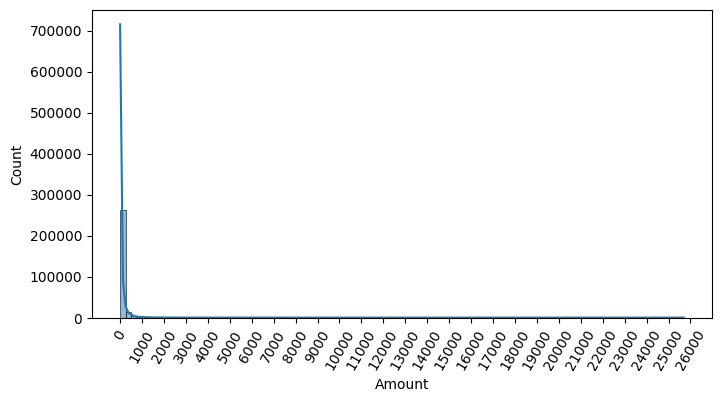

In [48]:
import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.histplot(card_df['Amount'],bins=100,kde=True)
plt.show()


In [49]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
  df_copy.insert(0,'Amount_Scaled',amount_n)
  df_copy.drop(['Time','Amount'], axis=1, inplace=True)
  return df_copy

In [50]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱     회귀     예측    성능    ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱     회귀     예측    성능    ###
오차   행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도:  0.8692, 재현율:  0.6284

### LightGBM 예측 성능 ###
오차   행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도:  0.9569, 재현율:  0.7500


<Axes: >

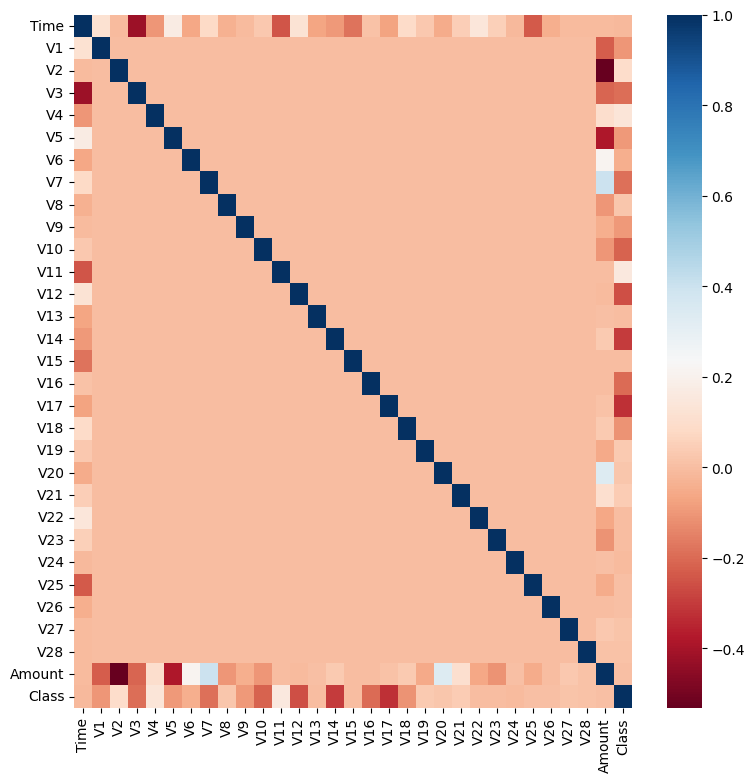

In [51]:
import seaborn as sns
plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')


In [53]:
import numpy as np
def get_outlier(df=None,column=None, weight=1.5):
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [54]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0,  'Amount_Scaled',  amount_n)
  df_copy.drop(['Time',   'Amount'],   axis=1,   inplace=True)
#  이상치     데이터     삭제하는    로직     추가
  outlier_index = get_outlier(df=df_copy, column='V14',weight=1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

X_train, X_test, y_train,   y_test = get_train_test_dataset(card_df)
print('### 로지스틱     회귀     예측    성능    ###')
get_model_train_eval(lr_clf,  ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf,  ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,  tgt_test=y_test)

### 로지스틱     회귀     예측    성능    ###
오차   행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도:  0.8673, 재현율:  0.6712
### LightGBM 예측 성능 ###
오차   행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도:  0.9603, 재현율:  0.8288


In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print ('SMOTE  적용    전     학습용    피처/레이블    데이터     세트: ',   X_train. shape, y_train. shape)
print ('SMOTE  적용   후   학습용    피처/레이블    데이터     세트: ',   X_train_over.shape,  y_train_over. shape)
print('SMOTE  적용    후    레이블    값   분포:  \n',   pd.Series(y_train_over).value_counts())

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78e8d83cfe20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.12/dist-packages/numpy.libs/libscipy_openblas64_-99b71e

SMOTE  적용    전     학습용    피처/레이블    데이터     세트:  (199362, 29) (199362,)
SMOTE  적용   후   학습용    피처/레이블    데이터     세트:  (398040, 29) (398040,)
SMOTE  적용    후    레이블    값   분포:  
 Class
0    199020
1    199020
Name: count, dtype: int64


In [56]:
lr_clf = LogisticRegression(max_iter=1000)
# ftr_train과   tgt_train 인자값이     SMOTE  증식된    X_train_over와   yjxairvover로     변경됨에     유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over,
tgt_test=y_test)

오차   행렬
[[82933  2362]
 [   11   135]]
정확도: 0.9722, 정밀도:  0.0541, 재현율:  0.9247


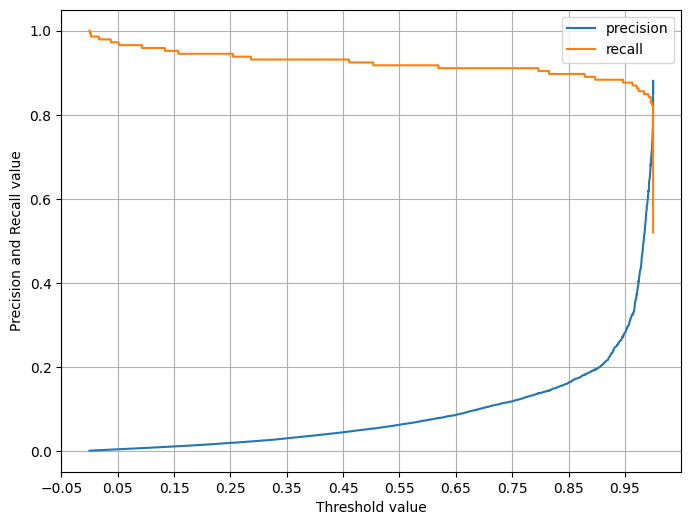

In [57]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

def precision_recall_threshold_plot(y_true, pred_proba, step=0.1):
    precisions, recalls, thresholds = precision_recall_curve(y_true, pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precisions[:-1], linestyle='--', label='Precision')
    plt.plot(thresholds, recalls[:-1], label='Recall')
    start, end = plt.xlim()
    tick_start = max(0.0, start); tick_end = min(1.0, end)
    ticks = np.round(np.arange(tick_start, tick_end + 1e-9, step), 2)
    if len(ticks) > 0: plt.xticks(ticks)
    plt.xlabel('Threshold'); plt.ylabel('Score')
    plt.title('Precision/Recall vs. Threshold')
    plt.grid(True); plt.legend(); plt.show()

def precision_recall_curve_plot(y_true, pred_proba):
    precisions, recalls, _ = precision_recall_curve(y_true, pred_proba)
    plt.figure(figsize=(6, 6))
    plt.plot(recalls, precisions)
    plt.xlabel('Recall'); plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True); plt.show()

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

def precision_recall_curve_plot(y_test,  pred_proba_c1):
    #    threshold ndarray와    이      threshold에     따른    정밀도, 재현율    ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    #    소축을    thre아lold값으로, 우축은     정밀도, 재현율    값으로    각각    Plot 수행.  정밀도는    점선으로    표시
    plt.figure(figsize=(8, 6))
    # Corrected extra comma and using plt.plot
    plt.plot(thresholds, precisions[0:thresholds.shape[0]], linestyle='-', label='precision')
    # Using plt.plot
    plt.plot(thresholds, recalls[0:thresholds.shape[0]],  label='recall')

    #    threshold 값   X 축의     Seal은을    0.1  단위로    변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    #    x축, y축    label과    legend, 그리고   grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

# Corrected typo in function name
precision_recall_curve_plot( y_test,   lr_clf.predict_proba(X_test)[:, 1 ]     )

In [58]:
lgbm_clf = LGBMClassifier(n_estimators=1000,  num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf,  ftr_train=X_train_over, ftr_test=X_test,
tgt_train=y_train_over, tgt_test=y_test)

오차   행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도:  0.9118, 재현율:  0.8493


In [59]:
import numpy  as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
cancer_data = load_breast_cancer()
X_data = cancer_data.data
y_label = cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [61]:
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)
lr_final = LogisticRegression()

In [62]:
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [63]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9737


In [64]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)
#    transpose를     이용해     행과    열의     위치     교환.  칼럼     레벨로    각    알고리즘의     예측    결과를    피처로    만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [65]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)
print('최종   메타    모델의     예측    정확도:  {0:.4f}'.format(accuracy_score(y_test,final)))

최종   메타    모델의     예측    정확도:  0.9649


In [66]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model,   X_train_n,   y_train_n, X_test_n,   n_folds ):
#   지정된     n_folds값으로    KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False)
#   추후에     메타    모델이     사용할    학습    데이터      반환을    위한    넘파이     배열     초기화
  train_fold_pred = np.zeros((X_train_n.shape[0],   1    ))
  test_pred = np.zeros((X_test_n.shape[0],  n_folds))
  print (model.__class__.__name__ , 'model  시작' )

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
# 입력된     학습    데이터에서     기반    모델이     학습/예측할   폴드    데이터     세트    추출
    print('\t  폴드    세트: ',    folder_counter,  '  시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]
#   폴드    세트    내부에서     다시      만들어진     학습    데이터로    기반    모델의     학습    수행.
    model.fit(X_tr, y_tr)
#   폴드    세트    내부에서     다시      만들어진     검증    데이터로    기반    모델     예측    후    데이터     저장.
    train_fold_pred[valid_index, :]   = model.predict(X_te).reshape(-1,  1)
#   입력된     원본    테스트    데이터를   폴드    세트내    학습된     기반    모델에서     예측    후    데이터     저장.
  test_pred[:,  folder_counter] = model.predict(X_test_n)
#   폴드    세트    내에서     원본    테스트    데이터를    예측한    데이터를    평균하여     테스트    데이터로    생성
  test_pred_mean = np.mean(test_pred, axis=1 ).reshape(-1,  1)
#   train_fold_pred는    최종    메타    모델이     사용하는    학습    데이터, test_pred_mean은    테스트    데이터
  return train_fold_pred, test_pred_mean

In [67]:
knn_train,knn_test = get_stacking_base_datasets(knn_clf,  X_train, y_train,   X_test,  7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf,  X_train, y_train, X_test,  7)
dt_train,dt_test = get_stacking_base_datasets(dt_clf,  X_train,   y_train,   X_test,      7)
ada_train,ada_test = get_stacking_base_datasets(ada_clf,  X_train, y_train, X_test,   7)

KNeighborsClassifier model  시작
	  폴드    세트:  0   시작
	  폴드    세트:  1   시작
	  폴드    세트:  2   시작
	  폴드    세트:  3   시작
	  폴드    세트:  4   시작
	  폴드    세트:  5   시작
	  폴드    세트:  6   시작
RandomForestClassifier model  시작
	  폴드    세트:  0   시작
	  폴드    세트:  1   시작
	  폴드    세트:  2   시작
	  폴드    세트:  3   시작
	  폴드    세트:  4   시작
	  폴드    세트:  5   시작
	  폴드    세트:  6   시작
DecisionTreeClassifier model  시작
	  폴드    세트:  0   시작
	  폴드    세트:  1   시작
	  폴드    세트:  2   시작
	  폴드    세트:  3   시작
	  폴드    세트:  4   시작
	  폴드    세트:  5   시작
	  폴드    세트:  6   시작
AdaBoostClassifier model  시작
	  폴드    세트:  0   시작
	  폴드    세트:  1   시작
	  폴드    세트:  2   시작
	  폴드    세트:  3   시작
	  폴드    세트:  4   시작
	  폴드    세트:  5   시작
	  폴드    세트:  6   시작


In [68]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train,  ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본    학습    피처     데이터     Shape:',   X_train.shape,  '원본    테스트    피처     Shape:',X_test.shape)
print('스태킹    학습    피처     데이터     Shape:',Stack_final_X_train.shape,
'스태킹      테스트    피처     데이터     Shape:',Stack_final_X_test.shape)


원본    학습    피처     데이터     Shape: (455, 30) 원본    테스트    피처     Shape: (114, 30)
스태킹    학습    피처     데이터     Shape: (455, 4) 스태킹      테스트    피처     데이터     Shape: (114, 4)


In [69]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)
print('최종    메타    모델의     예측    정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종    메타    모델의     예측    정확도: 0.4123
